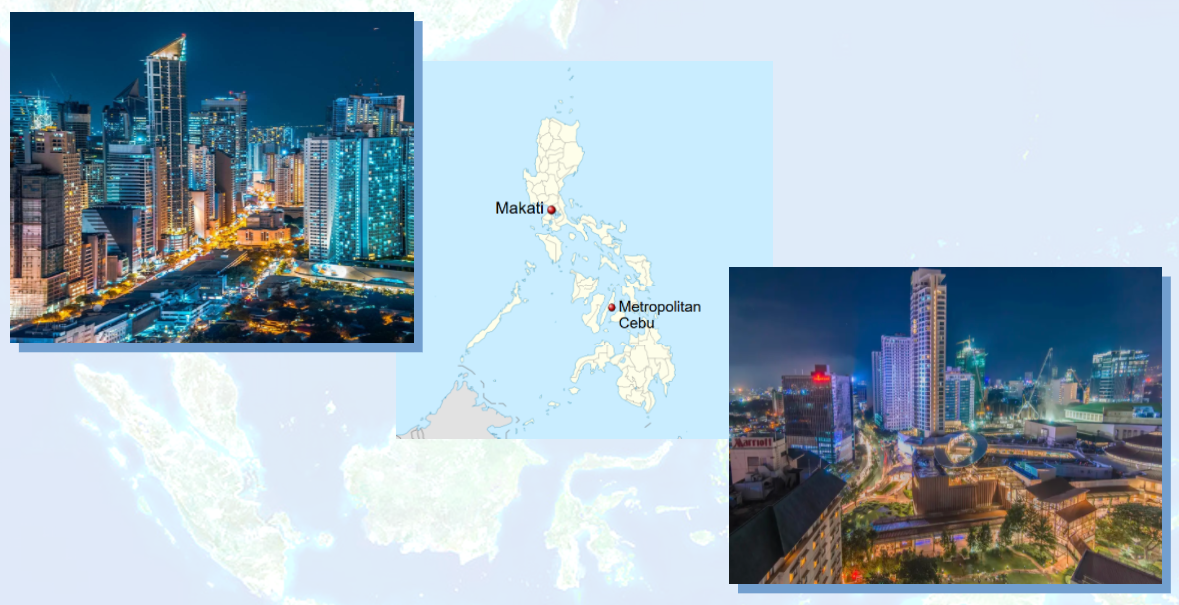

# Comparative Analysis of Venues in Makati and Cebu City in the Philippines
### A capstone submission in fulfillment of IBM-Corsera Data Science Course

## Table of contents
* [I.   Introduction: Business Problem](#introduction)
* [II.  Data](#data)
* [III. Methodology](#methodology)
* [IV.  Analysis](#analysis)
* [V.   Results and Discussion](#results)
* [VI.  Conclusion](#conclusion)






&emsp;


## I.    Introduction: Business Problem <a name="introduction"></a>

**Problem Statement**

This capstone project aims to explore in what ways are the venues in the neighborhood-areas of Makati City and Metropolitan Cebu similar or dissimilar. 

After working overseas for over 10 years, in countries such as Thailand and Singapore, a usual question I get from friends and colleques would be about what to see and where to go outside the capital of Metro Manila or an alternative to Makati?  

This Capstone project aims to study the landscape of venues available in the two metropolitan areas, Makati City and Metropolitan Cebu. Both locations have business establishments, industrial sites, and a destination for local and foreign talent. It will be interesting to see what common venues comprise each locale, particularly Metro Cebu.

**Background**


In the Philippines, Makati City is known as the financial capital wherein a large number of local and multinational businesses are establised. Situated in the country's National Capital Region (NCR), Makati was founded on November 4, 1670 and has a total land area of 21.57 sq.km (8.33 sq mi)[4]. It has a population of 582,602 based on the 2015 Census. An assortment of  banking and financial institutions, commercial shopping spaces and entertainment hubs can be found here.  The wide availability and developed modes of transportation such as the Metro Rail System (MRT), buses and jeepneys help promote trading and the bustling business-centric environment.

South of NCR is Metropolitan Cebu or Metro Cebu for short. A metropolitan area located at the central eastern portion 
of Cebu island in the Central Visayas Region of Philippines. It has an area of 1,062.88 sq.km (410.38 sq mi)and a population of 2,849,213 according to the 2015 Census. In 2005 and 2007, the region was host to the Southeast Asian Games and ASEAN Summit and 2nd East Asia Summit, respectively[1]. Having a strategic location in the center of the Philippines, Metro Cebu has seen growth in various industries, such as trade, manufacturing, Business Process Outsourcing (BPO), and real estate. The other surrounding islands provides an assortment of liesure spots, picturesque beaches and dive sites outisde the business-centric metro.

**Target Audience**

The study is applicable to investors and traders who plan to visit the country for business. Having an idea of the popular establishments accessible to the local population of Makati and Metro Cebu. Another perspective is that, would Cebu City be an alternative to Makati, for individuals who plan to bring business over or just simply to visit as tourists and experience what each location has to offer.


## II.    Data <a name="data"></a>

1. Online/Wikipedia Scraping
    * Makati and Metro Cebu Postal Codes, Area, and Location Names. Philippine-based datasets will have different column naming and arrangement compared to the Toronto datasets in the course and will need to be standardized.
    * HTML table location of Postal Codes and figures are ordered differently within the webpage. As such, some changes in BeautifulSoup API parameters and Pandas are needed to create and clean the dataframes.
    
		  
2. Geographical Coordinates
    * Philippines Geo-coordinates. After researching, a consolidated csv will be created from www.aggdata.com and www.geonames.org, which will have the Postal/ZIP code for each area.
    * Latitude and longitude coordnates will be merged with Makati and Metro Cebu Postal Codes.


3. Venue data
    * The Foursquare API will be used to collect venues based on the geo-coordinates of each Postal code or area.
    
    
4. Other methods will be mentioned as the study progresses, applying Corsera-learned material on different set of data.
    * Charts to describe statistics of Makati and Metro Cebu
    * Folium library to visualize location data
    * Data wrangling, filtering dataframes and cleaning the data.

# III.    Methodology <a name="methodology"></a>

1. Generate the starting raw data for the areas in the Philippines and their corresponding Zip or Postal codes.
    * Source: https://en.wikipedia.org/wiki/List_of_ZIP_codes_in_the_Philippines.
    * Use the function request.get with HTML text option to create the raw object data.
    * BeautifulSoup API was used to pull HTML data and save in a soup object.
    

2. From researching online (www.aggdata.com and www.geonames.org), a consolidated zip code csv file (PHZIP.csv) was generated and converted into a Pandas dataframe (df_PH_geo) by pd.read_csv.


3. Generate the working dataframes for the Makati City and Metro Cebu. DF coulumn names were standardized and cleaned.
    * Main groups under study, Makati and Metro Cebu, had column names of "Province or city", are renamed to "Area".
    * Postal code column name was renamed to ZIP Code.
    * From the raw data, ZIP codes can be used to refer to a neighborhood or commercial establishments. "Area" was used as the column name.
        
    
4. Create the Makati dataframe by filtering Area = 'Makati' and applying merging with df_PH_geo. Zip code was referenced as the join parameter.
    

5. For the Metro Cebu dataframe, an intermediate step was needed. Metropolitan Cebu is the collection of cities and smaller municipalities in Cebu province [1]. A list was created for the member locations (mtro_cbu = ['Carcar', 'Cebu City', 'Danao', 'Lapu-Lapu', 'Mandaue', 'Naga', 'Talisay','Compostela', 'Consolacion', 'Cordova', 'Liloan', 'Minglanilla', 'San Fernando']). The working dataframe was made by filtering based on this list [df_cebu['Area'].isin(mtro_cbu)] . Applied the same filtering and merging operations from step 4, but using 'Cebu'.
    
    
6. Folium map object creation for Makati and Metro Cebu.
    * Geopy was used for geocode coordinate data
    * Labelling points with Area labels

    
7. Utilizing the Foursquare API to explore the areas in Makati and Metro Cebu.
    * Provide Foursquare credentials and other client details.
    * Preview venue information on selected locations. Greenbelt, for Makati City and Cebu City, for Metro Cebu.
        
    
8. Use getNearbyVenues function for each area in Makati and Metro Cebu to create a new dataframes.
    
    
9. Perform one_hot encoding function to get the frequency of venue occurence in each area. Then group rows (using groupby method) by area and by taking the mean of the frequency of occurrence of each venue category. Rank by top 10.
        
    
10. Apply K-means clustering.
    
    
11. Consolidate by merging cluster data and the top 10 venues for each area.
    
    
12. Visualization of resulting clusters of venues observed in the Makati and Metro Cebu locations.
    * Latitude and longitude geodata were used for the Folium map.
    * Marker definitions, colors and label data are based on kcluster data derived from the previous steps.
    * Kcluster coordinates are then overlayed on the respective maps.
    
    
13. Examine and analyze each cluster for Makati and Metro Cebu, and observed similarities and differences.
    



    

    
    
    
    
    

## IV.    Analysis <a name="analysis"></a>

In [93]:
# Install required Python packages and APIs
# Load dependecies

In [2]:
import numpy as np  #Handles data in vectorized manner
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge bs4 --yes
!conda install -c conda-forge html5lib --yes
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge beautifulsoup4 --yes

from bs4 import BeautifulSoup
import pandas as pd #To perform data analysis and make dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.display import display_html
from IPython.display import display
import json #Library for handling JSON data
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm  # Matplotlib and associated plotting modules
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Scraping Data From Philippines Postal Wiki-page

#### Scraping and parsing using the Python package BeautifulSoup and with lxml parser.

In [3]:
# Assign Pihilippine postal / zip code text data in object
source_phil = requests.get('https://en.wikipedia.org/wiki/List_of_ZIP_codes_in_the_Philippines').text

soup_phil = BeautifulSoup(source_phil,'lxml')  # Pull HTML data sand save in soup object
table_phil = str(soup_phil.find_all('table')[1])  # Grab the second table (table[1])
display_html(table_phil, raw=True)

ZIP Code,Area,Province or city
400,International Correspondence School,San Juan
401,Asian Development Bank,San Juan
410,Radio Bible Class,San Juan
420,Bible School on the Air,San Juan
550,Febias College of Bible,Valenzuela
560,Far East Broadcasting Corporation,Valenzuela
700,Plain Truth Ministries,Makati
701,Colgate Palmolive Philippines,Makati
702,Citibank,Makati
703,Sarmiento Enterprises,Makati


In [4]:
# Use function read_html to make a dataFrame object for Philippine zip codes
# Creating "City" column from "Province or city" and drop the "Province or city" dataframe. Inspect the data.
df_phil = pd.read_html(table_phil, header=0)[0]
df_phil.insert(1,'City',df_phil['Province or city'])
df_phil.drop('Province or city',axis = 1, inplace=True)
df_phil.head()

,ZIP Code,City,Area
0,400,San Juan,International Correspondence School
1,401,San Juan,Asian Development Bank
2,410,San Juan,Radio Bible Class
3,420,San Juan,Bible School on the Air
4,550,Valenzuela,Febias College of Bible


In [5]:
df_phil.shape

(2111, 3)

### Extracting data from df_phil to make dataframes for Makati and Metro Cebu

### Create dataframe for Makati (df_mkt)
#### Making the cleaned and working dataframe for Makati City

In [6]:
df_mkt = df_phil[df_phil['City']=='Makati']
df_mkt.head()

,ZIP Code,City,Area
6,700,Makati,Plain Truth Ministries
7,701,Makati,Colgate Palmolive Philippines
8,702,Makati,Citibank
9,703,Makati,Sarmiento Enterprises
10,704,Makati,Producers Bank


#### Use groupby to combine Areas with the same zip code in Makati

In [7]:
df_mkt = df_mkt.groupby(["ZIP Code","City"],sort = False).agg(','.join) # Joins everything after Zip Code & City
df_mkt.reset_index(inplace=True)
df_mkt.head()

,ZIP Code,City,Area
0,700,Makati,Plain Truth Ministries
1,701,Makati,Colgate Palmolive Philippines
2,702,Makati,Citibank
3,703,Makati,Sarmiento Enterprises
4,704,Makati,Producers Bank


#### Load the csv file of Philippine zip codes and latitude/longitude information

In [8]:
df_PH_geo = pd.read_csv("./PHZIP.csv")
df_PH_geo.drop('Country',axis = 1, inplace=True)
df_PH_geo.drop('Location name',axis = 1, inplace=True)
df_PH_geo.head()

,Postal Code,Latitude,Longitude
0,400,14.5750,121.0609
1,401,14.5876,121.0596
2,410,14.6014,121.0365
3,420,14.6033,121.0448
4,550,14.6879,120.9951


#### Merge the Makati and PH_geo dataframes via Zip/Postal codes as reference join condition

In [9]:
df_mkt_loc = pd.merge(df_mkt, df_PH_geo, how='left', left_on = 'ZIP Code', right_on = 'Postal Code')
df_mkt_loc = df_mkt_loc[df_mkt_loc['Postal Code'].notnull()]
df_mkt_loc.drop('Postal Code',axis = 1, inplace=True)
df_mkt_loc = df_mkt_loc.reset_index(drop = True)
df_mkt_loc.head()

,ZIP Code,City,Area,Latitude,Longitude
0,1200,Makati,Makati Central Post Office,14.561530,121.014605
1,1201,Makati,Fort Bonifacio,14.551736,121.047843
2,1202,Makati,Fort Bonifacio Naval Station,14.517618,121.050865
3,1203,Makati,San Antonio Village,14.563182,121.013090
4,1204,Makati,"La Paz, Singkamas, and Tejeros",14.571054,121.009129


In [10]:
df_mkt_loc.shape

(36, 5)

### Create dataframe for Metro Cebu (df_metro_cebu)
#### Making the cleaned and working dataframe for Metro Cebu
#### After reviewing the full Philippine dataframe, the working dataframe for Metro Cebu will be prepared in 2 steps. First is to filter out Cebu areas and second, filter out 'Carcar', 'Cebu City', 'Danao', 'Lapu-Lapu', 'Mandaue', 'Naga', 'Talisay','Compostela', 'Consolacion', 'Cordova'. The locales in these mentioned cities and minicipalities collectively make up Metropolitan Cebu. 

In [11]:
df_phil.head()

,ZIP Code,City,Area
0,400,San Juan,International Correspondence School
1,401,San Juan,Asian Development Bank
2,410,San Juan,Radio Bible Class
3,420,San Juan,Bible School on the Air
4,550,Valenzuela,Febias College of Bible


In [12]:
df_phil.shape

(2111, 3)

#### Define a list of the areas that make-up Metro Cebu

In [13]:
df_cebu = df_phil[df_phil['City']=='Cebu']
df_cebu.head()

,ZIP Code,City,Area
1354,6000,Cebu,Cebu City
1355,6001,Cebu,Consolacion
1356,6002,Cebu,Liloan
1357,6003,Cebu,Compostela
1358,6004,Cebu,Danao


In [14]:
df_cebu.shape

(54, 3)

In [15]:
mtro_cbu = ['Carcar', 'Cebu City', 'Danao', 'Lapu-Lapu', 'Mandaue', 'Naga', 'Talisay','Compostela', 'Consolacion', 'Cordova', 'Liloan', 'Minglanilla', 'San Fernando']
df_metro_cebu = df_cebu[df_cebu['Area'].isin(mtro_cbu)]
df_metro_cebu.head(20)

,ZIP Code,City,Area
1354,6000,Cebu,Cebu City
1355,6001,Cebu,Consolacion
1356,6002,Cebu,Liloan
1357,6003,Cebu,Compostela
1358,6004,Cebu,Danao
1368,6014,Cebu,Mandaue
1371,6017,Cebu,Cordova
1372,6018,Cebu,San Fernando
1373,6019,Cebu,Carcar
1391,6037,Cebu,Naga


In [16]:
df_metro_cebu.shape

(12, 3)

#### Merge the Metro Cebu and PH_geo dataframes via Zip/Postal codes as reference join condition

In [17]:
df_metro_cebu_loc = pd.merge(df_metro_cebu, df_PH_geo, how='left', left_on = 'ZIP Code', right_on = 'Postal Code')
df_metro_cebu_loc = df_metro_cebu_loc[df_metro_cebu_loc['Postal Code'].notnull()]
df_metro_cebu_loc.drop('Postal Code',axis = 1, inplace=True)
df_metro_cebu_loc = df_metro_cebu_loc.reset_index(drop = True)
df_metro_cebu_loc

,ZIP Code,City,Area,Latitude,Longitude
0,6000,Cebu,Cebu City,10.315699,123.885437
1,6001,Cebu,Consolacion,10.436784,123.941552
2,6002,Cebu,Liloan,10.412129,123.986149
3,6003,Cebu,Compostela,10.465900,123.980576
4,6004,Cebu,Danao,10.541750,123.952703
5,6014,Cebu,Mandaue,10.340262,123.941552
6,6017,Cebu,Cordova,10.250000,123.950000
7,6018,Cebu,San Fernando,10.187116,123.684699
8,6019,Cebu,Carcar,10.115111,123.639956
9,6037,Cebu,Naga,10.259123,123.729420


### Exploring and clustering the areas in Makati and Metro Cebu

#### 1. Exploring neighbourhoods in Makati
Review of Makati dataframe from the previous tasks. Here we see latitude and longitude coordinates for each Area.
We start by getting an overview of the number of locations available

In [18]:
display(df_mkt_loc.head())

,ZIP Code,City,Area,Latitude,Longitude
0,1200,Makati,Makati Central Post Office,14.561530,121.014605
1,1201,Makati,Fort Bonifacio,14.551736,121.047843
2,1202,Makati,Fort Bonifacio Naval Station,14.517618,121.050865
3,1203,Makati,San Antonio Village,14.563182,121.013090
4,1204,Makati,"La Paz, Singkamas, and Tejeros",14.571054,121.009129


In [19]:
print('The Makati dataframe has {} areas.'.format(
        len(df_mkt_loc['Area'].unique()),
        df_mkt_loc.shape[0]
    )
)

The Makati dataframe has 36 areas.


In [20]:
display(df_metro_cebu_loc.head())

,ZIP Code,City,Area,Latitude,Longitude
0,6000,Cebu,Cebu City,10.315699,123.885437
1,6001,Cebu,Consolacion,10.436784,123.941552
2,6002,Cebu,Liloan,10.412129,123.986149
3,6003,Cebu,Compostela,10.465900,123.980576
4,6004,Cebu,Danao,10.541750,123.952703


In [21]:
print('The Metro Cebu dataframe has {} areas.'.format(
        len(df_metro_cebu_loc['Area'].unique()),
        df_metro_cebu_loc.shape[0]
    )
)

The Metro Cebu dataframe has 12 areas.


### Use geopy library to get the latitude and longitude values of Makati City

In [22]:
mkt_address = "Makati, Metro Manila"
mkt_geolocator = Nominatim(user_agent="ph_explorer")
mkt_location = mkt_geolocator.geocode(mkt_address)
mkt_latitude = mkt_location.latitude
mkt_longitude = mkt_location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(mkt_address,mkt_latitude,mkt_longitude))

The geograpical coordinates of Makati, Metro Manila are 14.5480343, 121.0128136.


#### Creating a map of Makati with areas marked with nice purple markers on top

In [23]:
# Using Folium, create a map using latitude and longitude values
map_makati = folium.Map(location=[mkt_latitude, mkt_longitude], zoom_start=10)
for lat, lng, city, area in zip(df_mkt_loc['Latitude'], df_mkt_loc['Longitude'], df_mkt_loc['City'], df_mkt_loc['Area']):
    label = '{}, {}'.format(df_mkt_loc, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_makati)  
map_makati

### Use geopy library to get the latitude and longitude values of Cebu City

In [24]:
metro_cebu_address = "Metro Cebu"
metro_cebu_geolocator = Nominatim(user_agent="ph_explorer")
metro_cebu_location = metro_cebu_geolocator.geocode(metro_cebu_address)
metro_cebu_latitude = metro_cebu_location.latitude
metro_cebu_longitude = metro_cebu_location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(metro_cebu_address,metro_cebu_latitude,metro_cebu_longitude))

The geograpical coordinates of Metro Cebu are 10.3131603, 123.955997.


#### Creating a map of Metro Cebu with areas marked with nice purple markers on top

In [25]:
# Using Folium, create a map using latitude and longitude values
map_metro_cebu = folium.Map(location=[metro_cebu_latitude, metro_cebu_longitude], zoom_start=10)
for lat, lng, city, area in zip(df_metro_cebu_loc['Latitude'], df_metro_cebu_loc['Longitude'], df_metro_cebu_loc['City'], df_metro_cebu_loc['Area']):
    label = '{}, {}'.format(df_metro_cebu_loc, area)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_metro_cebu)  
map_metro_cebu

# Utilizing the Foursquare API to explore the areas in Makati and Metro Cebu
### Performing segmentation on both locations

In [26]:
CLIENT_ID = '11AZKMMXMZTOOMBTOFDIPG4BL3XO1DEOOBZZHF51TV5QFZJH' # Foursquare ID
CLIENT_SECRET = '5HWCFPYL5KRAANFGPVZLUWPQGLMMQLMHSO3PQ0CDEUDTME35' # Foursquare Secret
VERSION = '20180604' # Foursquare API version
print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 11AZKMMXMZTOOMBTOFDIPG4BL3XO1DEOOBZZHF51TV5QFZJH
CLIENT_SECRET:5HWCFPYL5KRAANFGPVZLUWPQGLMMQLMHSO3PQ0CDEUDTME35


#### Previewing venues in one sample area in each metropolitan location
1.  Greenbelt, for Makati City
2.  Cebu City, for Metro Cebu

In [27]:
df_mkt_loc.loc[28,'Area']

'Greenbelt'

In [77]:
df_metro_cebu_loc.loc[0,'Area']

'Cebu City'

In [28]:
area_latitude1 = df_mkt_loc.loc[28, 'Latitude'] 
area_longitude1 = df_mkt_loc.loc[28, 'Longitude']
area_name1 = df_mkt_loc.loc[28, 'Area']

area_latitude2 = df_metro_cebu_loc.loc[0, 'Latitude'] 
area_longitude2 = df_metro_cebu_loc.loc[0, 'Longitude']
area_name2 = df_metro_cebu_loc.loc[0, 'Area']

print('Latitude and longitude values of {} are {}, {}.'.format(area_name1, area_latitude1, area_longitude1))
print('Latitude and longitude values of {} are {}, {}.'.format(area_name2, area_latitude2, area_longitude2))

Latitude and longitude values of Greenbelt are 14.554070000000001, 121.018948.
Latitude and longitude values of Cebu City are 10.3156992, 123.88543660000003.


### Getting the top 100 venues in Greenbelt and Cebu City within a radius of 500 meters. 
#### "URL" will be the default url name and create the GET request URL

In [29]:
# Greenbelt, for Makati City

LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    area_latitude1, 
    area_longitude1, 
    radius, 
    LIMIT)
#url
results = requests.get(url).json()
#results

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [89]:
venues = results['response']['groups'][0]['items'] 
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(12)

<ipython-input-89-93b7b7d2ff48>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Wildflour Café + Bakery,Café,14.555582,121.018130
1,"The Curator, Coffee & Cocktails",Café,14.554463,121.017994
2,Makati Diamond Residences,Residential Building (Apartment / Condo),14.553794,121.020856
3,Bistro Pamana,Filipino Restaurant,14.554566,121.020456
4,The Spa,Spa,14.553137,121.019539
5,Cyma,Greek Restaurant,14.552276,121.020243
6,Touch and Heal,Massage Studio,14.555641,121.017668
7,ALFRED at Makati Diamond Residences,Restaurant,14.553763,121.020776
8,The Coffee Bean & Tea Leaf,Coffee Shop,14.555795,121.018240
9,Salad Stop!,Salad Place,14.555944,121.019502


In [30]:
# Cebu City, for Cebu

LIMIT = 100
radius = 500
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    area_latitude2, 
    area_longitude2, 
    radius, 
    LIMIT)
#url
results2 = requests.get(url2).json()
#results

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [91]:
venues2 = results2['response']['groups'][0]['items'] 
nearby_venues2 = json_normalize(venues2)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 = nearby_venues2.loc[:, filtered_columns]
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]
nearby_venues2.head(12)

<ipython-input-91-00a4b70047bc>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues2 = json_normalize(venues2)


,name,categories,lat,lng
0,Pan de Manila,Bakery,10.316184,123.886306
1,The Original AA BBQ,BBQ Joint,10.317470,123.887487
2,Lola Eat's Food House,Fast Food Restaurant,10.316504,123.886989
3,Nonki Japanese Restaurant,Japanese Restaurant,10.315338,123.884309
4,"Little India - One Pavilion Mall, Banawa, Cebu...",Vegetarian / Vegan Restaurant,10.314893,123.884137
5,Kelli Olé Kaffe,Café,10.317164,123.885223
6,Orange Brutus,Burger Joint,10.315199,123.884080
7,Cebu's Original Lechon Belly - One Pavilion,Filipino Restaurant,10.315387,123.884272
8,Canberry Hotel,Hotel,10.317573,123.885077
9,Dong Juan,Burger Joint,10.318635,123.886361


# Exploring the venues in Makati City

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Call getNearbyVenues function for each area in Makati and create a new dataframe.

In [32]:
df_makati_venues = getNearbyVenues(names=df_mkt_loc['Area'],
                                   latitudes=df_mkt_loc['Latitude'],
                                   longitudes=df_mkt_loc['Longitude']
                                  )

Makati Central Post Office
Fort Bonifacio
Fort Bonifacio Naval Station
San Antonio Village
La Paz, Singkamas, and Tejeros
Santa Cruz
Kasilawan
Carmona–Olympia
Valenzuela
Bel-Air
Poblacion
Guadalupe Viejo
Guadalupe Nuevo
Pinagkaisahan–Pitogo
Cembo and South Cembo
West Rembo
East Rembo–Malapad na Bato
Comembo
Pembo
Forbes Park North
Forbes Park South
Dasmariñas Village North
Dasmariñas Village South
San Lorenzo Village
Makati Commercial Center (Ayala Center)
Urdaneta Village
Ayala Avenue–Paseo de Roxas
Salcedo Village
Greenbelt
Legaspi Village
Pio del Pilar
Chino Roces,Pasong Tamo–Ecology Village
Magallanes Village
Bangkal
San Isidro
Palanan


### Examining the new dataframe of venues in Makati City

In [33]:
df_makati_venues.head(100)

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Makati Central Post Office,14.561530,121.014605,Bornga,14.562258,121.015908,Korean Restaurant
1,Makati Central Post Office,14.561530,121.014605,Yellow Cab Pizza Co.,14.561108,121.015583,Pizza Place
2,Makati Central Post Office,14.561530,121.014605,Intercontinental Hotels Group,14.560932,121.016764,Office
3,Makati Central Post Office,14.561530,121.014605,"The City Club, Makati Place",14.562574,121.016296,Building
4,Makati Central Post Office,14.561530,121.014605,Yuchengco Museum,14.560399,121.016234,Art Museum
5,Makati Central Post Office,14.561530,121.014605,OptionsStudio Valero,14.560435,121.016610,Yoga Studio
6,Makati Central Post Office,14.561530,121.014605,TJ Grill,14.564169,121.015143,Beer Garden
7,Makati Central Post Office,14.561530,121.014605,Purple Oven,14.564467,121.013748,Bakery
8,Makati Central Post Office,14.561530,121.014605,Carlos P. Romulo Auditorium,14.561124,121.016417,Theater
9,Makati Central Post Office,14.561530,121.014605,Starbucks Reserve,14.558522,121.015032,Coffee Shop


In [34]:
df_makati_venues.shape

(1294, 7)

### Number of venues returned for each Makati Area

In [35]:
df_makati_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Ayala Avenue–Paseo de Roxas,31,31,31,31,31,31
Bangkal,18,18,18,18,18,18
Bel-Air,100,100,100,100,100,100
Carmona–Olympia,51,51,51,51,51,51
Cembo and South Cembo,16,16,16,16,16,16
"Chino Roces,Pasong Tamo–Ecology Village",33,33,33,33,33,33
Comembo,20,20,20,20,20,20
Dasmariñas Village North,35,35,35,35,35,35
Dasmariñas Village South,12,12,12,12,12,12


### Examine how many unique categories can be curated from all the returned venues

In [36]:
print('There are {} uniques categories.'.format(len(df_makati_venues['Venue Category'].unique())))

There are 178 uniques categories.


### Analyze each area in Makati
#### Use onehot encoding

In [37]:
makati_onehot = pd.get_dummies(df_makati_venues[['Venue Category']], prefix="", prefix_sep="")  # one hot encoding
makati_onehot['Area'] = df_makati_venues['Area']  # add area column back to dataframe
# move neighbourhood column to the first column
fixed_columns = [makati_onehot.columns[-1]] + list(makati_onehot.columns[:-1])
makati_onehot = makati_onehot[fixed_columns]
makati_onehot.head(11)

,Area,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Cafeteria,Café,Camera Store,Campground,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Hostel,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mongolian Restaurant,Motel,Movie Theater,Multiplex,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nursery School,Office,Okonomiyaki Restaurant,Optical Shop,Other Nightlife,Paella Restaurant,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Repair,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Makati Central Post Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Makati Central Post Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Makati Central Post Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Makati Central Post Office,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
print("The shape of the Makati venue onehot encoding set is {}.".format(makati_onehot.shape))

The shape of the Makati venue onehot encoding set is (1294, 179).


### Group rows by area and by taking the mean of the frequency of occurrence of each category

In [39]:
makati_grouped = makati_onehot.groupby('Area').mean().reset_index()
makati_grouped.head(11)

,Area,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Cafeteria,Café,Camera Store,Campground,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Hostel,Hotel,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lounge,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mongolian Restaurant,Motel,Movie Theater,Multiplex,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nursery School,Office,Okonomiyaki Restaurant,Optical Shop,Other Nightlife,Paella Restaurant,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Repair,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ayala Avenue–Paseo de Roxas,0.0,0.00,0.0,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.032258,0.000000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,0.000000,0.032258,0.032258,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.032258,0.0,0.000000,0.000000,0.000000,0.096774,0.00,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.064516,0.000000,0.000000,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.032258,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.064516,0.032258,0.000000,0.0,0.032258,0.0,0.0,0.0,0.0000,0.000000,0.0,0.032258,0.00,0.00,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.032258,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.032258,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.032258,0.000000,0.000000,0.00,0.032258,0.032258,0.032258,0.0,0.0,0.000000,0.00,0.0,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.0,0.000000,0.000000,0.000000,0.032258,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.032258,0.0,0.0,0.00,0.000000,0.032258,0.0,0.00,0.00,0.0,0.0,0.096774
1,Bangkal,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.055556,0.000000,0.055556,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00,0.000000,0.0,0.0

In [40]:
print("The shape of the Makati grouped dataset is {}.".format(makati_grouped.shape))

The shape of the Makati grouped dataset is (36, 179).


### Displaying the top 10 most common venues in each Makati Area

In [49]:
num_top_venues = 10
for mkloc in makati_grouped['Area']:
    print("----"+mkloc+"----")
    temp = makati_grouped[makati_grouped['Area'] == mkloc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    display(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ayala Avenue–Paseo de Roxas----


,venue,freq
0,Yoga Studio,0.10
1,Coffee Shop,0.10
2,Japanese Restaurant,0.06
3,Filipino Restaurant,0.06
4,Salon / Barbershop,0.03
5,Building,0.03
6,Spanish Restaurant,0.03
7,Chinese Restaurant,0.03
8,Shopping Mall,0.03
9,Sandwich Place,0.03




----Bangkal----


,venue,freq
0,Convenience Store,0.22
1,Fast Food Restaurant,0.11
2,Miscellaneous Shop,0.06
3,BBQ Joint,0.06
4,Food,0.06
5,Chinese Restaurant,0.06
6,Grocery Store,0.06
7,Tapas Restaurant,0.06
8,Gym,0.06
9,Bar,0.06




----Bel-Air----


,venue,freq
0,Coffee Shop,0.09
1,Café,0.06
2,Spa,0.05
3,Filipino Restaurant,0.03
4,Dessert Shop,0.03
5,Hotel,0.03
6,Cocktail Bar,0.03
7,Bakery,0.03
8,Steakhouse,0.03
9,Korean Restaurant,0.02




----Carmona–Olympia----


,venue,freq
0,Café,0.06
1,Fast Food Restaurant,0.06
2,Coffee Shop,0.06
3,Convenience Store,0.06
4,Filipino Restaurant,0.04
5,Soccer Field,0.04
6,Clothing Store,0.04
7,Gym / Fitness Center,0.04
8,Go Kart Track,0.02
9,Gastropub,0.02




----Cembo and South Cembo----


,venue,freq
0,Fast Food Restaurant,0.31
1,Convenience Store,0.25
2,Basketball Court,0.06
3,Breakfast Spot,0.06
4,Bus Line,0.06
5,Market,0.06
6,Motel,0.06
7,Bakery,0.06
8,Pharmacy,0.06
9,Performing Arts Venue,0.00




----Chino Roces,Pasong Tamo–Ecology Village----


,venue,freq
0,Convenience Store,0.12
1,Pizza Place,0.06
2,Tea Room,0.06
3,BBQ Joint,0.06
4,Bar,0.06
5,Chinese Restaurant,0.03
6,German Restaurant,0.03
7,Coffee Shop,0.03
8,Bubble Tea Shop,0.03
9,Swiss Restaurant,0.03




----Comembo----


,venue,freq
0,Convenience Store,0.20
1,Diner,0.15
2,Fast Food Restaurant,0.15
3,Food Truck,0.10
4,Gym / Fitness Center,0.05
5,Tapas Restaurant,0.05
6,Spa,0.05
7,Breakfast Spot,0.05
8,Cosmetics Shop,0.05
9,Café,0.05




----Dasmariñas Village North----


,venue,freq
0,Beer Garden,0.09
1,Hotel,0.09
2,Karaoke Bar,0.06
3,Grocery Store,0.06
4,Dessert Shop,0.06
5,Szechuan Restaurant,0.03
6,Bistro,0.03
7,Pharmacy,0.03
8,Tapas Restaurant,0.03
9,Sandwich Place,0.03




----Dasmariñas Village South----


,venue,freq
0,Basketball Court,0.17
1,Soccer Field,0.17
2,Furniture / Home Store,0.08
3,Bus Line,0.08
4,Art Gallery,0.08
5,Diner,0.08
6,Ice Cream Shop,0.08
7,Hotel,0.08
8,Coffee Shop,0.08
9,Theater,0.08




----East Rembo–Malapad na Bato----


,venue,freq
0,Diner,0.18
1,Convenience Store,0.18
2,Fast Food Restaurant,0.12
3,Nail Salon,0.06
4,Chinese Restaurant,0.06
5,Café,0.06
6,Optical Shop,0.06
7,Gym / Fitness Center,0.06
8,Spa,0.06
9,Ice Cream Shop,0.06




----Forbes Park North----


,venue,freq
0,Filipino Restaurant,0.07
1,Art Gallery,0.07
2,Coffee Shop,0.07
3,Fast Food Restaurant,0.04
4,Japanese Restaurant,0.04
5,Gym,0.04
6,Furniture / Home Store,0.04
7,Bubble Tea Shop,0.04
8,Diner,0.04
9,Donut Shop,0.04




----Forbes Park South----


,venue,freq
0,Beer Garden,0.09
1,Hotel,0.09
2,Karaoke Bar,0.06
3,Grocery Store,0.06
4,Dessert Shop,0.06
5,Szechuan Restaurant,0.03
6,Bistro,0.03
7,Pharmacy,0.03
8,Tapas Restaurant,0.03
9,Sandwich Place,0.03




----Fort Bonifacio----


,venue,freq
0,Coffee Shop,0.12
1,Japanese Restaurant,0.06
2,Plaza,0.03
3,Sporting Goods Shop,0.03
4,Bar,0.03
5,Yoga Studio,0.02
6,Thai Restaurant,0.02
7,French Restaurant,0.02
8,Supermarket,0.02
9,Spanish Restaurant,0.02




----Fort Bonifacio Naval Station----


,venue,freq
0,Airport Terminal,0.09
1,Market,0.09
2,Soup Place,0.09
3,Park,0.09
4,Fast Food Restaurant,0.09
5,Chinese Restaurant,0.09
6,Sculpture Garden,0.09
7,Bakery,0.09
8,Clothing Store,0.09
9,Food Truck,0.09




----Greenbelt----


,venue,freq
0,Café,0.10
1,Shopping Mall,0.06
2,Coffee Shop,0.06
3,Italian Restaurant,0.05
4,Japanese Restaurant,0.05
5,Filipino Restaurant,0.05
6,Clothing Store,0.05
7,Spa,0.04
8,Boutique,0.03
9,Gym,0.03




----Guadalupe Nuevo----


,venue,freq
0,Diner,0.18
1,Convenience Store,0.18
2,Fast Food Restaurant,0.12
3,Nail Salon,0.06
4,Chinese Restaurant,0.06
5,Café,0.06
6,Optical Shop,0.06
7,Gym / Fitness Center,0.06
8,Spa,0.06
9,Ice Cream Shop,0.06




----Guadalupe Viejo----


,venue,freq
0,Diner,0.18
1,Convenience Store,0.18
2,Fast Food Restaurant,0.12
3,Nail Salon,0.06
4,Chinese Restaurant,0.06
5,Café,0.06
6,Optical Shop,0.06
7,Gym / Fitness Center,0.06
8,Spa,0.06
9,Ice Cream Shop,0.06




----Kasilawan----


,venue,freq
0,Donut Shop,0.11
1,Dim Sum Restaurant,0.05
2,Coffee Shop,0.05
3,Shopping Mall,0.05
4,Pastry Shop,0.05
5,Multiplex,0.05
6,Filipino Restaurant,0.05
7,Clothing Store,0.05
8,Bike Shop,0.05
9,Beer Garden,0.05




----La Paz, Singkamas, and Tejeros----


,venue,freq
0,Fried Chicken Joint,0.2
1,Antique Shop,0.2
2,Filipino Restaurant,0.2
3,Hostel,0.2
4,Market,0.2
5,Pastry Shop,0.0
6,Nursery School,0.0
7,Office,0.0
8,Okonomiyaki Restaurant,0.0
9,Optical Shop,0.0




----Legaspi Village----


,venue,freq
0,Café,0.10
1,Shopping Mall,0.06
2,Coffee Shop,0.06
3,Italian Restaurant,0.05
4,Japanese Restaurant,0.05
5,Filipino Restaurant,0.05
6,Clothing Store,0.05
7,Spa,0.04
8,Boutique,0.03
9,Gym,0.03




----Magallanes Village----


,venue,freq
0,Diner,0.22
1,Fried Chicken Joint,0.11
2,Food & Drink Shop,0.11
3,Ice Cream Shop,0.11
4,Supermarket,0.11
5,Coffee Shop,0.11
6,Donut Shop,0.11
7,Mattress Store,0.11
8,Pastry Shop,0.00
9,Office,0.00




----Makati Central Post Office----


,venue,freq
0,Grocery Store,0.06
1,Beer Garden,0.06
2,Karaoke Bar,0.06
3,Bar,0.06
4,Hotel,0.06
5,Coffee Shop,0.03
6,Gym,0.03
7,Building,0.03
8,Sporting Goods Shop,0.03
9,Office,0.03




----Makati Commercial Center (Ayala Center)----


,venue,freq
0,Coffee Shop,0.09
1,Fast Food Restaurant,0.06
2,Donut Shop,0.06
3,Shopping Mall,0.03
4,Breakfast Spot,0.03
5,Seafood Restaurant,0.03
6,Gym / Fitness Center,0.03
7,Gym,0.03
8,Pastry Shop,0.03
9,Burrito Place,0.03




----Palanan----


,venue,freq
0,Filipino Restaurant,0.07
1,Pharmacy,0.07
2,Fast Food Restaurant,0.07
3,Pizza Place,0.07
4,Bakery,0.07
5,Hotel,0.04
6,Food Court,0.04
7,Coffee Shop,0.04
8,Gym,0.04
9,Bookstore,0.04




----Pembo----


,venue,freq
0,Intersection,0.17
1,Gym,0.17
2,Campground,0.17
3,Fast Food Restaurant,0.17
4,Breakfast Spot,0.17
5,Ramen Restaurant,0.17
6,Nursery School,0.00
7,Okonomiyaki Restaurant,0.00
8,Optical Shop,0.00
9,Other Nightlife,0.00




----Pinagkaisahan–Pitogo----


,venue,freq
0,Diner,0.18
1,Convenience Store,0.18
2,Fast Food Restaurant,0.12
3,Nail Salon,0.06
4,Chinese Restaurant,0.06
5,Café,0.06
6,Optical Shop,0.06
7,Gym / Fitness Center,0.06
8,Spa,0.06
9,Ice Cream Shop,0.06




----Pio del Pilar----


,venue,freq
0,Japanese Restaurant,0.18
1,Convenience Store,0.07
2,Pizza Place,0.05
3,Bar,0.04
4,Restaurant,0.03
5,Music Venue,0.03
6,Coffee Shop,0.03
7,Diner,0.03
8,Donut Shop,0.03
9,Fast Food Restaurant,0.03




----Poblacion----


,venue,freq
0,Fast Food Restaurant,0.31
1,Soup Place,0.08
2,Intersection,0.08
3,Ice Cream Shop,0.08
4,Asian Restaurant,0.08
5,Laundromat,0.08
6,Cafeteria,0.08
7,Filipino Restaurant,0.08
8,Chinese Restaurant,0.08
9,Grocery Store,0.08




----Salcedo Village----


,venue,freq
0,Yoga Studio,0.10
1,Coffee Shop,0.10
2,Japanese Restaurant,0.06
3,Filipino Restaurant,0.06
4,Salon / Barbershop,0.03
5,Building,0.03
6,Spanish Restaurant,0.03
7,Chinese Restaurant,0.03
8,Shopping Mall,0.03
9,Sandwich Place,0.03




----San Antonio Village----


,venue,freq
0,Coffee Shop,0.09
1,Filipino Restaurant,0.05
2,BBQ Joint,0.04
3,Donut Shop,0.04
4,Pizza Place,0.03
5,Convenience Store,0.03
6,Sandwich Place,0.03
7,Bar,0.03
8,Bakery,0.03
9,Restaurant,0.03




----San Isidro----


,venue,freq
0,Fast Food Restaurant,0.18
1,Chinese Restaurant,0.09
2,Filipino Restaurant,0.09
3,Cupcake Shop,0.05
4,Music Venue,0.05
5,Ramen Restaurant,0.05
6,Donut Shop,0.05
7,Convenience Store,0.05
8,Clothing Store,0.05
9,Pizza Place,0.05




----San Lorenzo Village----


,venue,freq
0,Coffee Shop,0.12
1,Sandwich Place,0.04
2,Park,0.04
3,Spa,0.04
4,Café,0.04
5,Donut Shop,0.04
6,Burrito Place,0.04
7,Pizza Place,0.04
8,Spanish Restaurant,0.04
9,Korean Restaurant,0.04




----Santa Cruz----


,venue,freq
0,Beer Garden,0.09
1,Hotel,0.09
2,Karaoke Bar,0.06
3,Grocery Store,0.06
4,Dessert Shop,0.06
5,Szechuan Restaurant,0.03
6,Bistro,0.03
7,Pharmacy,0.03
8,Tapas Restaurant,0.03
9,Sandwich Place,0.03




----Urdaneta Village----


,venue,freq
0,Yoga Studio,0.10
1,Coffee Shop,0.10
2,Japanese Restaurant,0.06
3,Filipino Restaurant,0.06
4,Salon / Barbershop,0.03
5,Building,0.03
6,Spanish Restaurant,0.03
7,Chinese Restaurant,0.03
8,Shopping Mall,0.03
9,Sandwich Place,0.03




----Valenzuela----


,venue,freq
0,Grocery Store,0.06
1,Beer Garden,0.06
2,Karaoke Bar,0.06
3,Bar,0.06
4,Hotel,0.06
5,Coffee Shop,0.03
6,Gym,0.03
7,Building,0.03
8,Sporting Goods Shop,0.03
9,Office,0.03




----West Rembo----


,venue,freq
0,Intersection,0.17
1,Karaoke Bar,0.17
2,Convenience Store,0.17
3,Bus Station,0.17
4,Fast Food Restaurant,0.17
5,Bed & Breakfast,0.17
6,Performing Arts Venue,0.00
7,Okonomiyaki Restaurant,0.00
8,Optical Shop,0.00
9,Other Nightlife,0.00


#### Function to sort the venues in descending order

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### New dataframe displaying the top 10 most common venues in each Makati area

In [51]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Area'] # create columns according to number of top venues
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = makati_grouped['Area']

for ind in np.arange(makati_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ayala Avenue–Paseo de Roxas,Yoga Studio,Coffee Shop,Japanese Restaurant,Filipino Restaurant,Salad Place,Building,Buffet,Shopping Mall,Mediterranean Restaurant,Spanish Restaurant
1,Bangkal,Convenience Store,Fast Food Restaurant,Food,Resort,Chinese Restaurant,Diner,Tapas Restaurant,Bar,BBQ Joint,Grocery Store
2,Bel-Air,Coffee Shop,Café,Spa,Hotel,Cocktail Bar,Dessert Shop,Bakery,Steakhouse,Filipino Restaurant,Burger Joint
3,Carmona–Olympia,Café,Convenience Store,Coffee Shop,Fast Food Restaurant,Soccer Field,Filipino Restaurant,Clothing Store,Gym / Fitness Center,Snack Place,Shopping Mall
4,Cembo and South Cembo,Fast Food Restaurant,Convenience Store,Motel,Basketball Court,Bus Line,Market,Bakery,Breakfast Spot,Pharmacy,Electronics Store
5,"Chino Roces,Pasong Tamo–Ecology Village",Convenience Store,Bar,Tea Room,Pizza Place,BBQ Joint,German Restaurant,Dumpling Restaurant,Steakhouse,Donut Shop,Chinese Restaurant
6,Comembo,Convenience Store,Diner,Fast Food Restaurant,Food Truck,Bakery,Breakfast Spot,Tapas Restaurant,Café,Cosmetics Shop,Spa
7,Dasmariñas Village North,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
8,Dasmariñas Village South,Soccer Field,Basketball Court,Ice Cream Shop,Theater,Furniture / Home Store,Diner,Coffee Shop,Bus Line,Hotel,Art Gallery
9,East Rembo–Malapad na Bato,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café


## Cluster of Makati Areas
#### Run k-means to cluster the Makati areas into 5 clusters.

In [52]:
# set number of clusters
kclusters = 7
makati_grouped_cluster = makati_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(makati_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 2, 1, 2, 4, 0, 2, 4])

### Consolidating everyting by merging cluster data and the top 10 venues for each area in one dataframe.

In [53]:
# add clustering labels
area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
makati_merged = df_mkt_loc # Makati dataframe with geolocations

# merge makati_grouped (having venue data) with df_mkt_loc (zip, area, geo) 
# to add latitude/longitude for each area
makati_merged = makati_merged.join(area_venues_sorted.set_index('Area'), on='Area')
makati_merged

,ZIP Code,City,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1200,Makati,Makati Central Post Office,14.561530,121.014605,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
1,1201,Makati,Fort Bonifacio,14.551736,121.047843,2,Coffee Shop,Japanese Restaurant,Sporting Goods Shop,Bar,Plaza,Spanish Restaurant,Dessert Shop,Park,Mediterranean Restaurant,Hotel
2,1202,Makati,Fort Bonifacio Naval Station,14.517618,121.050865,2,Airport Terminal,Park,Fast Food Restaurant,Food Truck,Market,Sculpture Garden,Bakery,Chinese Restaurant,Soup Place,Asian Restaurant
3,1203,Makati,San Antonio Village,14.563182,121.013090,2,Coffee Shop,Filipino Restaurant,BBQ Joint,Donut Shop,Convenience Store,Restaurant,Bar,Bakery,Pizza Place,Asian Restaurant
4,1204,Makati,"La Paz, Singkamas, and Tejeros",14.571054,121.009129,3,Market,Hostel,Antique Shop,Filipino Restaurant,Fried Chicken Joint,Yoga Studio,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
5,1205,Makati,Santa Cruz,14.567448,121.015591,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
6,1206,Makati,Kasilawan,14.572800,121.014700,2,Donut Shop,Coffee Shop,Pastry Shop,Spa,Soup Place,Shopping Mall,Sandwich Place,Clothing Store,Cosmetics Shop,Dim Sum Restaurant
7,1207,Makati,Carmona–Olympia,14.571781,121.021325,2,Café,Convenience Store,Coffee Shop,Fast Food Restaurant,Soccer Field,Filipino Restaurant,Clothing Store,Gym / Fitness Center,Snack Place,Shopping Mall
8,1208,Makati,Valenzuela,14.561530,121.014605,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
9,1209,Makati,Bel-Air,14.562797,121.026192,2,Coffee Shop,Café,Spa,Hotel,Cocktail Bar,Dessert Shop,Bakery,Steakhouse,Filipino Restaurant,Burger Joint


#### Creating the new dataframe and display the top 10 venues for each area

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = makati_grouped['Area']

for ind in np.arange(makati_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ayala Avenue–Paseo de Roxas,Yoga Studio,Coffee Shop,Japanese Restaurant,Filipino Restaurant,Salad Place,Building,Buffet,Shopping Mall,Mediterranean Restaurant,Spanish Restaurant
1,Bangkal,Convenience Store,Fast Food Restaurant,Food,Resort,Chinese Restaurant,Diner,Tapas Restaurant,Bar,BBQ Joint,Grocery Store
2,Bel-Air,Coffee Shop,Café,Spa,Hotel,Cocktail Bar,Dessert Shop,Bakery,Steakhouse,Filipino Restaurant,Burger Joint
3,Carmona–Olympia,Café,Convenience Store,Coffee Shop,Fast Food Restaurant,Soccer Field,Filipino Restaurant,Clothing Store,Gym / Fitness Center,Snack Place,Shopping Mall
4,Cembo and South Cembo,Fast Food Restaurant,Convenience Store,Motel,Basketball Court,Bus Line,Market,Bakery,Breakfast Spot,Pharmacy,Electronics Store
5,"Chino Roces,Pasong Tamo–Ecology Village",Convenience Store,Bar,Tea Room,Pizza Place,BBQ Joint,German Restaurant,Dumpling Restaurant,Steakhouse,Donut Shop,Chinese Restaurant
6,Comembo,Convenience Store,Diner,Fast Food Restaurant,Food Truck,Bakery,Breakfast Spot,Tapas Restaurant,Café,Cosmetics Shop,Spa
7,Dasmariñas Village North,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
8,Dasmariñas Village South,Soccer Field,Basketball Court,Ice Cream Shop,Theater,Furniture / Home Store,Diner,Coffee Shop,Bus Line,Hotel,Art Gallery
9,East Rembo–Malapad na Bato,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café


#### Visualization of resulting clusters of venues observed in the Makati area

In [55]:
# create map
map_clusters = folium.Map(location=[mkt_latitude, mkt_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(makati_merged['Latitude'], makati_merged['Longitude'], makati_merged['Area'], makati_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examining the Makati Clusters

#### With these Makati clusters identified, we can compare venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 0

In [56]:
# Cluster 0
makati_merged.loc[makati_merged['Cluster Labels'] == 0, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Makati,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
5,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
8,Makati,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
20,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
21,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop


#### Cluster 1

In [57]:
# Cluster 1
makati_merged.loc[makati_merged['Cluster Labels'] == 1, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Makati,1,Fast Food Restaurant,Convenience Store,Motel,Basketball Court,Bus Line,Market,Bakery,Breakfast Spot,Pharmacy,Electronics Store
15,Makati,1,Convenience Store,Intersection,Fast Food Restaurant,Karaoke Bar,Bus Station,Bed & Breakfast,Yoga Studio,Dumpling Restaurant,Flea Market,Filipino Restaurant
33,Makati,1,Convenience Store,Fast Food Restaurant,Food,Resort,Chinese Restaurant,Diner,Tapas Restaurant,Bar,BBQ Joint,Grocery Store


#### Cluster 2

In [58]:
# Cluster 2
makati_merged.loc[makati_merged['Cluster Labels'] == 2, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Makati,2,Coffee Shop,Japanese Restaurant,Sporting Goods Shop,Bar,Plaza,Spanish Restaurant,Dessert Shop,Park,Mediterranean Restaurant,Hotel
2,Makati,2,Airport Terminal,Park,Fast Food Restaurant,Food Truck,Market,Sculpture Garden,Bakery,Chinese Restaurant,Soup Place,Asian Restaurant
3,Makati,2,Coffee Shop,Filipino Restaurant,BBQ Joint,Donut Shop,Convenience Store,Restaurant,Bar,Bakery,Pizza Place,Asian Restaurant
6,Makati,2,Donut Shop,Coffee Shop,Pastry Shop,Spa,Soup Place,Shopping Mall,Sandwich Place,Clothing Store,Cosmetics Shop,Dim Sum Restaurant
7,Makati,2,Café,Convenience Store,Coffee Shop,Fast Food Restaurant,Soccer Field,Filipino Restaurant,Clothing Store,Gym / Fitness Center,Snack Place,Shopping Mall
9,Makati,2,Coffee Shop,Café,Spa,Hotel,Cocktail Bar,Dessert Shop,Bakery,Steakhouse,Filipino Restaurant,Burger Joint
19,Makati,2,Art Gallery,Filipino Restaurant,Coffee Shop,Donut Shop,Gym,Japanese Restaurant,Furniture / Home Store,Fast Food Restaurant,Bubble Tea Shop,Diner
22,Makati,2,Soccer Field,Basketball Court,Ice Cream Shop,Theater,Furniture / Home Store,Diner,Coffee Shop,Bus Line,Hotel,Art Gallery
23,Makati,2,Coffee Shop,Spa,Park,Spanish Restaurant,Sandwich Place,Korean Restaurant,Burrito Place,Café,Pizza Place,Donut Shop
24,Makati,2,Coffee Shop,Fast Food Restaurant,Donut Shop,Climbing Gym,Breakfast Spot,Shopping Plaza,Shopping Mall,Seafood Restaurant,Burrito Place,Restaurant


#### Cluster 3

In [59]:
# Cluster 3
makati_merged.loc[makati_merged['Cluster Labels'] == 3, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Makati,3,Market,Hostel,Antique Shop,Filipino Restaurant,Fried Chicken Joint,Yoga Studio,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant


In [60]:
# Cluster 4
makati_merged.loc[makati_merged['Cluster Labels'] == 4, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
12,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
13,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
16,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
17,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Food Truck,Bakery,Breakfast Spot,Tapas Restaurant,Café,Cosmetics Shop,Spa
32,Makati,4,Diner,Ice Cream Shop,Supermarket,Fried Chicken Joint,Mattress Store,Donut Shop,Food & Drink Shop,Coffee Shop,Eastern European Restaurant,Flea Market


In [61]:
# Cluster 5
makati_merged.loc[makati_merged['Cluster Labels'] == 5, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Makati,5,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,Filipino Restaurant,Cafeteria,Chinese Restaurant,Grocery Store,Laundromat,Soup Place,Intersection


In [62]:
# Cluster 6
makati_merged.loc[makati_merged['Cluster Labels'] == 6, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Makati,6,Ramen Restaurant,Gym,Fast Food Restaurant,Breakfast Spot,Campground,Intersection,Cycle Studio,Drugstore,Flea Market,Filipino Restaurant


# Exploring the venues in Metro Cebu

#### Using the getNearbyVenues function to pull venue data based on geo-coordinates and area.

In [66]:
df_metro_cebu_venues = getNearbyVenues(names=df_metro_cebu_loc['Area'],
                                   latitudes=df_metro_cebu_loc['Latitude'],
                                   longitudes=df_metro_cebu_loc['Longitude']
                                  )

Cebu City
Consolacion
Liloan
Compostela
Danao
Mandaue
Cordova
San Fernando
Carcar
Naga
Talisay
Minglanilla


### Examining the new dataframe of venues in Metro Cebu

In [67]:
df_metro_cebu_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cebu City,10.315699,123.885437,Pan de Manila,10.316184,123.886306,Bakery
1,Cebu City,10.315699,123.885437,The Original AA BBQ,10.317470,123.887487,BBQ Joint
2,Cebu City,10.315699,123.885437,Lola Eat's Food House,10.316504,123.886989,Fast Food Restaurant
3,Cebu City,10.315699,123.885437,Nonki Japanese Restaurant,10.315338,123.884309,Japanese Restaurant
4,Cebu City,10.315699,123.885437,"Little India - One Pavilion Mall, Banawa, Cebu...",10.314893,123.884137,Vegetarian / Vegan Restaurant


In [68]:
df_metro_cebu_venues.shape

(54, 7)

#### From the queeried results we see that Cebu City has the most entries from Foursquare

In [69]:
df_metro_cebu_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Cebu City,28,28,28,28,28,28
Consolacion,4,4,4,4,4,4
Cordova,5,5,5,5,5,5
Danao,2,2,2,2,2,2
Liloan,1,1,1,1,1,1
Mandaue,5,5,5,5,5,5
Minglanilla,5,5,5,5,5,5
Talisay,4,4,4,4,4,4


In [70]:
print('There are {} uniques categories.'.format(len(df_metro_cebu_venues['Venue Category'].unique())))

There are 32 uniques categories.


### Analyze each area in Metro Cebu
#### Use onehot encoding

In [71]:
metro_cebu_onehot = pd.get_dummies(df_metro_cebu_venues[['Venue Category']], prefix="", prefix_sep="")
metro_cebu_onehot['Area'] = df_metro_cebu_venues['Area']
fixed_columns = [metro_cebu_onehot.columns[-1]] + list(metro_cebu_onehot.columns[:-1])
metro_cebu_onehot = metro_cebu_onehot[fixed_columns]
metro_cebu_onehot.head(11)

,Area,BBQ Joint,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café,Chinese Restaurant,Convenience Store,Donut Shop,English Restaurant,Fast Food Restaurant,Filipino Restaurant,Fishing Store,Fried Chicken Joint,Gas Station,Hotel,Japanese Restaurant,Motel,Mountain,Park,Pharmacy,Pizza Place,Playground,Plaza,Resort,Restaurant,Shopping Mall,Tea Room,Vegetarian / Vegan Restaurant,Veterinarian
0,Cebu City,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cebu City,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cebu City,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cebu City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cebu City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Cebu City,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Cebu City,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Cebu City,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Cebu City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Cebu City,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
print("The shape of the Metro Cebu venue onehot encoding set is {}.".format(metro_cebu_onehot.shape))

The shape of the Metro Cebu venue onehot encoding set is (54, 33).


In [73]:
metro_cebu_grouped = metro_cebu_onehot.groupby('Area').mean().reset_index()
metro_cebu_grouped.head(11)

,Area,BBQ Joint,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café,Chinese Restaurant,Convenience Store,Donut Shop,English Restaurant,Fast Food Restaurant,Filipino Restaurant,Fishing Store,Fried Chicken Joint,Gas Station,Hotel,Japanese Restaurant,Motel,Mountain,Park,Pharmacy,Pizza Place,Playground,Plaza,Resort,Restaurant,Shopping Mall,Tea Room,Vegetarian / Vegan Restaurant,Veterinarian
0,Cebu City,0.035714,0.035714,0.0,0.00,0.00,0.071429,0.00,0.107143,0.035714,0.035714,0.035714,0.035714,0.107143,0.071429,0.00,0.035714,0.0,0.107143,0.035714,0.035714,0.0,0.00,0.00,0.035714,0.00,0.0,0.0,0.0,0.035714,0.035714,0.071429,0.035714
1,Consolacion,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.25,0.00,0.000000,0.25,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,Cordova,0.000000,0.000000,0.2,0.20,0.00,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.2,0.2,0.0,0.000000,0.000000,0.000000,0.000000
3,Danao,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.5,0.000000,0.000000,0.000000,0.000000
4,Liloan,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,Mandaue,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.0,0.2,0.2,0.000000,0.000000,0.000000,0.000000
6,Minglanilla,0.400000,0.200000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.2,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.200000,0.000000,0.000000,0.000000
7,Talisay,0.000000,0.250000,0.0,0.25,0.25,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.25,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [74]:
num_top_venues = 10
for mcloc in metro_cebu_grouped['Area']:
    print("----"+mcloc+"----")
    temp = metro_cebu_grouped[metro_cebu_grouped['Area'] == mcloc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    display(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Cebu City----


,venue,freq
0,Café,0.11
1,Hotel,0.11
2,Fast Food Restaurant,0.11
3,Vegetarian / Vegan Restaurant,0.07
4,Burger Joint,0.07
5,Filipino Restaurant,0.07
6,BBQ Joint,0.04
7,Fried Chicken Joint,0.04
8,Tea Room,0.04
9,Shopping Mall,0.04




----Consolacion----


,venue,freq
0,Playground,0.25
1,Fishing Store,0.25
2,Park,0.25
3,Cafeteria,0.25
4,BBQ Joint,0.00
5,Motel,0.00
6,Mountain,0.00
7,Pharmacy,0.00
8,Pizza Place,0.00
9,Plaza,0.00




----Cordova----


,venue,freq
0,Resort,0.2
1,Plaza,0.2
2,Basketball Stadium,0.2
3,Beach,0.2
4,Convenience Store,0.2
5,Mountain,0.0
6,Park,0.0
7,Pharmacy,0.0
8,Pizza Place,0.0
9,Playground,0.0




----Danao----


,venue,freq
0,Restaurant,0.5
1,Fast Food Restaurant,0.5
2,BBQ Joint,0.0
3,Hotel,0.0
4,Vegetarian / Vegan Restaurant,0.0
5,Tea Room,0.0
6,Shopping Mall,0.0
7,Resort,0.0
8,Plaza,0.0
9,Playground,0.0




----Liloan----


,venue,freq
0,Mountain,1.0
1,BBQ Joint,0.0
2,Bakery,0.0
3,Vegetarian / Vegan Restaurant,0.0
4,Tea Room,0.0
5,Shopping Mall,0.0
6,Restaurant,0.0
7,Resort,0.0
8,Plaza,0.0
9,Playground,0.0




----Mandaue----


,venue,freq
0,Donut Shop,0.2
1,Restaurant,0.2
2,Resort,0.2
3,Fast Food Restaurant,0.2
4,Convenience Store,0.2
5,BBQ Joint,0.0
6,Mountain,0.0
7,Park,0.0
8,Pharmacy,0.0
9,Pizza Place,0.0




----Minglanilla----


,venue,freq
0,BBQ Joint,0.4
1,Bakery,0.2
2,Shopping Mall,0.2
3,Gas Station,0.2
4,Bed & Breakfast,0.0
5,Burger Joint,0.0
6,Vegetarian / Vegan Restaurant,0.0
7,Tea Room,0.0
8,Basketball Stadium,0.0
9,Restaurant,0.0




----Talisay----


,venue,freq
0,Bakery,0.25
1,Beach,0.25
2,Bed & Breakfast,0.25
3,Pharmacy,0.25
4,Playground,0.00
5,Motel,0.00
6,Mountain,0.00
7,Park,0.00
8,Pizza Place,0.00
9,BBQ Joint,0.00


In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = metro_cebu_grouped['Area']

for ind in np.arange(metro_cebu_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metro_cebu_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cebu City,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
1,Consolacion,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian
2,Cordova,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop
3,Danao,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria
4,Liloan,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café
5,Mandaue,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint
6,Minglanilla,BBQ Joint,Bakery,Shopping Mall,Gas Station,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Cafeteria
7,Talisay,Bakery,Beach,Bed & Breakfast,Pharmacy,Veterinarian,Fishing Store,Basketball Stadium,Burger Joint,Cafeteria,Café


In [77]:
# set number of clusters
kclusters = 7
metro_cebu_grouped_cluster = metro_cebu_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(metro_cebu_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 5, 1, 2, 0, 3, 4, 6])

In [78]:
# add clustering labels
area_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
metro_cebu_merged = df_metro_cebu_loc 

# merge makati_grouped (having venue data) with df_mkt_loc (zip, area, geo) 
# to add latitude/longitude for each area
metro_cebu_merged = metro_cebu_merged.join(area_venues_sorted.set_index('Area'), on='Area')
metro_cebu_merged

,ZIP Code,City,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6000,Cebu,Cebu City,10.315699,123.885437,3.0,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
1,6001,Cebu,Consolacion,10.436784,123.941552,5.0,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian
2,6002,Cebu,Liloan,10.412129,123.986149,0.0,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café
3,6003,Cebu,Compostela,10.465900,123.980576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6004,Cebu,Danao,10.541750,123.952703,2.0,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria
5,6014,Cebu,Mandaue,10.340262,123.941552,3.0,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint
6,6017,Cebu,Cordova,10.250000,123.950000,1.0,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop
7,6018,Cebu,San Fernando,10.187116,123.684699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6019,Cebu,Carcar,10.115111,123.639956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6037,Cebu,Naga,10.259123,123.729420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Some of the locations such as San Fernando and Compostela don't have Foursquare venue data. This is understandable since some areas are remote provincial lands and not fully commercialized such that the likelihood of third-party reviews will be far less or non-existent. 

#### The dataframe was cleaned by filtering non-NaN cluster entries and assigning to a new dataframe.

In [79]:
metro_cebu_merged2 = metro_cebu_merged[metro_cebu_merged['Cluster Labels'].notnull()]
metro_cebu_merged2

,ZIP Code,City,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6000,Cebu,Cebu City,10.315699,123.885437,3.0,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
1,6001,Cebu,Consolacion,10.436784,123.941552,5.0,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian
2,6002,Cebu,Liloan,10.412129,123.986149,0.0,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café
4,6004,Cebu,Danao,10.541750,123.952703,2.0,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria
5,6014,Cebu,Mandaue,10.340262,123.941552,3.0,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint
6,6017,Cebu,Cordova,10.250000,123.950000,1.0,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop
10,6045,Cebu,Talisay,10.252449,123.839233,6.0,Bakery,Beach,Bed & Breakfast,Pharmacy,Veterinarian,Fishing Store,Basketball Stadium,Burger Joint,Cafeteria,Café
11,6046,Cebu,Minglanilla,10.243302,123.788992,4.0,BBQ Joint,Bakery,Shopping Mall,Gas Station,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Cafeteria


In [80]:
metro_cebu_merged2['Cluster Labels'] = metro_cebu_merged2['Cluster Labels'].astype(int)

<ipython-input-80-ee02d51fd54a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_cebu_merged2['Cluster Labels'] = metro_cebu_merged2['Cluster Labels'].astype(int)


In [81]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = metro_cebu_grouped['Area']

for ind in np.arange(metro_cebu_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(metro_cebu_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cebu City,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
1,Consolacion,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian
2,Cordova,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop
3,Danao,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria
4,Liloan,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café
5,Mandaue,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint
6,Minglanilla,BBQ Joint,Bakery,Shopping Mall,Gas Station,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Cafeteria
7,Talisay,Bakery,Beach,Bed & Breakfast,Pharmacy,Veterinarian,Fishing Store,Basketball Stadium,Burger Joint,Cafeteria,Café


In [82]:
# create map
map_clusters = folium.Map(location=[metro_cebu_latitude, metro_cebu_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(metro_cebu_merged2['Latitude'], metro_cebu_merged2['Longitude'], metro_cebu_merged2['Area'], metro_cebu_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examining the Metro Cebu Clusters

#### Cluster 0

In [83]:
# Cluster 0
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 0, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Cebu,0,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café


#### Cluster 1

In [85]:
# Cluster 1
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 1, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Cebu,1,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop


#### Cluster 2

In [86]:
# Cluster 2
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 2, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Cebu,2,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria


#### Cluster 3 

In [87]:
# Cluster 3
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 3, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cebu,3,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
5,Cebu,3,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint


#### Cluster 4

In [88]:
# Cluster 4
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 4, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Cebu,4,BBQ Joint,Bakery,Shopping Mall,Gas Station,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Cafeteria


#### Cluster 5

In [89]:
# Cluster 5
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 5, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Cebu,5,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian


#### Cluster 6

In [90]:
# Cluster 6
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 6, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Cebu,6,Bakery,Beach,Bed & Breakfast,Pharmacy,Veterinarian,Fishing Store,Basketball Stadium,Burger Joint,Cafeteria,Café


-----------------

-----------------

## V.    Results and Discussion <a name="results"></a>

**Makati City**
1. Overall, the west region of Makati shows the highest density of venue clusters. Notedly, majority is comprised of cluster 2 coffee shop establishments and various forms of restaurants. It is shown to be a densely commercialized area bordered by Palanan,  Bel-Air, Makati-Ayala Commercial Center and Dasmarinas Vilage.
2. At the middle of cluster 2, interestingly cluster 0 is comprised of Karaoke spots and Beer Gardens, followed by hotel residential areas.  
3. Clusters 1, 4 , 5 and 6 are situated farther apart however similarly they are also restaurant and convenience store venues. 
4. Cluster 3, made up of La Paz, Singkamas, and Tejeros areas is where the market place is located, north-west of the hotel areas. The placement provides convenience and accessability to both restautant and hotel venues. 

#### Makati City Cluster Map of Venues

In [55]:
map_clusters = folium.Map(location=[mkt_latitude, mkt_longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(makati_merged['Latitude'], makati_merged['Longitude'], makati_merged['Area'], makati_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Cluster 0

In [101]:
makati_merged.loc[makati_merged['Cluster Labels'] == 0, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Makati,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
5,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
8,Makati,0,Karaoke Bar,Hotel,Grocery Store,Beer Garden,Bar,Yoga Studio,Building,Restaurant,Residential Building (Apartment / Condo),Office
20,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop
21,Makati,0,Beer Garden,Hotel,Grocery Store,Dessert Shop,Karaoke Bar,Szechuan Restaurant,Filipino Restaurant,Restaurant,Bubble Tea Shop,Donut Shop


#### Cluster 1

In [102]:
makati_merged.loc[makati_merged['Cluster Labels'] == 1, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Makati,1,Fast Food Restaurant,Convenience Store,Motel,Basketball Court,Bus Line,Market,Bakery,Breakfast Spot,Pharmacy,Electronics Store
15,Makati,1,Convenience Store,Intersection,Fast Food Restaurant,Karaoke Bar,Bus Station,Bed & Breakfast,Yoga Studio,Dumpling Restaurant,Flea Market,Filipino Restaurant
33,Makati,1,Convenience Store,Fast Food Restaurant,Food,Resort,Chinese Restaurant,Diner,Tapas Restaurant,Bar,BBQ Joint,Grocery Store


#### Cluster 2

In [103]:
makati_merged.loc[makati_merged['Cluster Labels'] == 2, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Makati,2,Coffee Shop,Japanese Restaurant,Sporting Goods Shop,Bar,Plaza,Spanish Restaurant,Dessert Shop,Park,Mediterranean Restaurant,Hotel
2,Makati,2,Airport Terminal,Park,Fast Food Restaurant,Food Truck,Market,Sculpture Garden,Bakery,Chinese Restaurant,Soup Place,Asian Restaurant
3,Makati,2,Coffee Shop,Filipino Restaurant,BBQ Joint,Donut Shop,Convenience Store,Restaurant,Bar,Bakery,Pizza Place,Asian Restaurant
6,Makati,2,Donut Shop,Coffee Shop,Pastry Shop,Spa,Soup Place,Shopping Mall,Sandwich Place,Clothing Store,Cosmetics Shop,Dim Sum Restaurant
7,Makati,2,Café,Convenience Store,Coffee Shop,Fast Food Restaurant,Soccer Field,Filipino Restaurant,Clothing Store,Gym / Fitness Center,Snack Place,Shopping Mall
9,Makati,2,Coffee Shop,Café,Spa,Hotel,Cocktail Bar,Dessert Shop,Bakery,Steakhouse,Filipino Restaurant,Burger Joint
19,Makati,2,Art Gallery,Filipino Restaurant,Coffee Shop,Donut Shop,Gym,Japanese Restaurant,Furniture / Home Store,Fast Food Restaurant,Bubble Tea Shop,Diner
22,Makati,2,Soccer Field,Basketball Court,Ice Cream Shop,Theater,Furniture / Home Store,Diner,Coffee Shop,Bus Line,Hotel,Art Gallery
23,Makati,2,Coffee Shop,Spa,Park,Spanish Restaurant,Sandwich Place,Korean Restaurant,Burrito Place,Café,Pizza Place,Donut Shop
24,Makati,2,Coffee Shop,Fast Food Restaurant,Donut Shop,Climbing Gym,Breakfast Spot,Shopping Plaza,Shopping Mall,Seafood Restaurant,Burrito Place,Restaurant


#### Cluster 3

In [104]:
makati_merged.loc[makati_merged['Cluster Labels'] == 3, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Makati,3,Market,Hostel,Antique Shop,Filipino Restaurant,Fried Chicken Joint,Yoga Studio,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant


#### Cluster 4

In [105]:
makati_merged.loc[makati_merged['Cluster Labels'] == 4, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
12,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
13,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
16,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Breakfast Spot,Gym / Fitness Center,Nail Salon,Optical Shop,Donut Shop,Chinese Restaurant,Café
17,Makati,4,Convenience Store,Diner,Fast Food Restaurant,Food Truck,Bakery,Breakfast Spot,Tapas Restaurant,Café,Cosmetics Shop,Spa
32,Makati,4,Diner,Ice Cream Shop,Supermarket,Fried Chicken Joint,Mattress Store,Donut Shop,Food & Drink Shop,Coffee Shop,Eastern European Restaurant,Flea Market


#### Cluster 5

In [106]:
makati_merged.loc[makati_merged['Cluster Labels'] == 5, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Makati,5,Fast Food Restaurant,Ice Cream Shop,Asian Restaurant,Filipino Restaurant,Cafeteria,Chinese Restaurant,Grocery Store,Laundromat,Soup Place,Intersection


#### Cluster 6

In [109]:
makati_merged.loc[makati_merged['Cluster Labels'] == 6, makati_merged.columns[[1] + list(range(5, makati_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Makati,6,Ramen Restaurant,Gym,Fast Food Restaurant,Breakfast Spot,Campground,Intersection,Cycle Studio,Drugstore,Flea Market,Filipino Restaurant


------

**Metropolitan Cebu**
1. Metro Cebu venue clusters are isolated to each other, as compared to Makati City, however are are strategically located lined-up along the eastern-region of Cebu island.
2. Cluster 3 has more commercial establishments in the region. Similar to Makati City, top venues are Cafe shops and Fast Food restaurants found in Cebu City capital and Mandaue.
3. A unique difference with Metro Cebu is the variety venue types offered in each cluster. 
4. The top venue in cluster 0 at Liloan is it's mountain region and veterinary establishments. An area for outdoor nature and animal sight-seeing enthusiasts.
5. Cordova in cluster 1 has an assortment of recreational venues for enjoyment. A basketball stadium being the top, followed by beach and resorts.
6. Cluster 2 (Danao) and cluster 4 (Minglanilla) are comprised of restaurants and BBQ venues.
7. Cluster 5 (Consolacion) and cluster 6 (Talisay) have parks and beaches.
 

#### Metropolitan Cebu Cluster Map of Venues

In [82]:
map_clusters = folium.Map(location=[metro_cebu_latitude, metro_cebu_longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(metro_cebu_merged2['Latitude'], metro_cebu_merged2['Longitude'], metro_cebu_merged2['Area'], metro_cebu_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### Cluster 0

In [110]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 0, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Cebu,0,Mountain,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria,Café


#### Cluster 1

In [111]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 1, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Cebu,1,Basketball Stadium,Beach,Resort,Plaza,Convenience Store,Veterinarian,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop


#### Cluster 2

In [112]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 2, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Cebu,2,Restaurant,Fast Food Restaurant,Veterinarian,Fishing Store,Bakery,Basketball Stadium,Beach,Bed & Breakfast,Burger Joint,Cafeteria


#### Cluster 3

In [113]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 3, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cebu,3,Café,Fast Food Restaurant,Hotel,Burger Joint,Filipino Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Japanese Restaurant,Bakery,Chinese Restaurant
5,Cebu,3,Fast Food Restaurant,Restaurant,Resort,Donut Shop,Convenience Store,Veterinarian,Café,English Restaurant,Chinese Restaurant,Burger Joint


#### Cluster 4

In [114]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 4, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Cebu,4,BBQ Joint,Bakery,Shopping Mall,Gas Station,Chinese Restaurant,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Cafeteria


#### Cluster 5

In [115]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 5, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Cebu,5,Cafeteria,Park,Playground,Fishing Store,Fast Food Restaurant,English Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,Veterinarian


#### Cluster 6

In [116]:
metro_cebu_merged2.loc[metro_cebu_merged2['Cluster Labels'] == 6, metro_cebu_merged2.columns[[1] + list(range(5, metro_cebu_merged2.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Cebu,6,Bakery,Beach,Bed & Breakfast,Pharmacy,Veterinarian,Fishing Store,Basketball Stadium,Burger Joint,Cafeteria,Café


--------------------

## VI.    Conclusion <a name="conclusion"></a>

The Data Science Capstone goal was to compare the venue similarities and differences between Makati City and Metropolitan Cebu locations in the Philippines. Folium maps representing Makati City and Metro Cebu locales were successfully generated, combined with cluster info from Foursquare statistics are overlayed in order to represent the clustering of venues/establishments present in each area under study.

Based on the venue classification types observed, Makati City has long been well known for the upscale nature of businesses and establishments in its locality. It is shown to be densely commercialized with food-based, life-style and shopping venues evident from cluster 2 that surround the hotel areas of Dasmarinas and Valenzuela.

Metropolitan Cebu has low density of venue groups that are isolated across the island. This allows more potential for commercial growth in the future and given the strategic location. Surrounded by shipping trade-routes and neighboring islands. It is evident that the Cebu City capital is the most commercialized with top venue-classifications similar to Makati City such as fast-food restaurants and hotels. The strength and unique attribute of Metro Cebu lies in the diversity of what each other venue cluster has to offer. Outisde of the bustling city-scapes of the capital, you have a mountain range in one location and on the other end of the spectrum, you have beaches and resorts. 

For stakeholders, Metro Cebu is an ideal location to visit to experience nature and the outdoors, with the option to satisfy the upscale commrcial life as provided by Cebu City. Visualization data in this study also help to show the cluster-spread with the help of geo-positions. Makati benefits from accessibility and modern transportation, while Metro Cebu clusters has seperated such that additional transportation and travel planning may be required. Whichever location you choose, there is something for you in the Philippines. 



----------------

References

[1] https://en.wikipedia.org/wiki/Metro_Cebu
[2] https://www.aggdata.com/
[3] https://geonames.org/
[4] https://psa.gov.ph